# Homework lesson2 Lakes

1. Generate 20 random variable from 1 to 100
2. Draw the plot of the sequence
3. Lets assume each point represent the height and so all plotting is 2d mountains
4. Then consider the unlimited rain from above - cavities become lakes full of water
5. Determine the deepest lakeake

#### Ініціалізація

array([88, 26, 71, 56, 34, 93,  4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70,
       89,  4, 59])

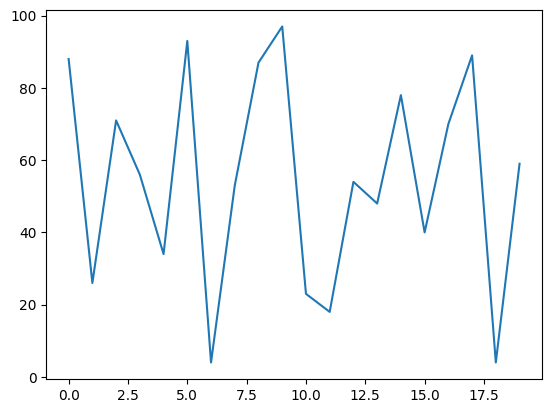

In [344]:
import numpy as np 
import matplotlib.pyplot as plt
import random
np.random.seed(2023)
a = np.random.randint(1,100,20)
plt.plot(a)
a

# Functions:

In [345]:
def get_rand_color():
    return "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

In [346]:
def get_depth(lakePoints):
    lakePoints_y = [a[x] for x in lakePoints]
    left_lake_edge = lakePoints_y[0]
    right_lake_edge = lakePoints_y[-1]
    lowest_lake_edge = min(left_lake_edge, right_lake_edge)
    lake_bottom = min(lakePoints_y)
    return lowest_lake_edge - lake_bottom

In [347]:
def is_lake(lakePoints):
    goes_up, goes_down = False, False
    for i in range(len(lakePoints)-1):
        if(a[lakePoints[i]] > a[lakePoints[i+1]]): goes_down = True
        if(a[lakePoints[i]] < a[lakePoints[i+1]]): goes_up = True
        if(goes_down and goes_up): break
    return goes_down and goes_up

In [348]:
def get_lakes(a):
    lakes = []
    
    for i in range(len(a)):
        lakes.append({'depth':0,
                       'points':[]})
        for j in range(i, 0, -1):
            # get left-side points of the lake
            p1 = a[j]
            p2 = a[j-1]
            lakes[i]['points'].append(j)
            if (p2 < p1):
                break
            if (j-1 == 0):
                lakes[i]['points'].append(j-1)

        lakes[i]['points'] = list(reversed(lakes[i]['points']))

        for j in range(i, len(a)-1):
            # get right-side points of the lake
            p1 = a[j]
            p2 = a[j+1]
            lakes[i]['points'].append(j)
            if (p2 < p1):
                break
            if (j+1 == len(a)-1):
                lakes[i]['points'].append(j+1)
                
    # remove the non lakes
    new_lakes = []
    for lake in lakes:
        if is_lake(lake['points']):
            lake['depth'] = get_depth(lake['points'])
            new_lakes.append(lake)
    return new_lakes

# Рішення:

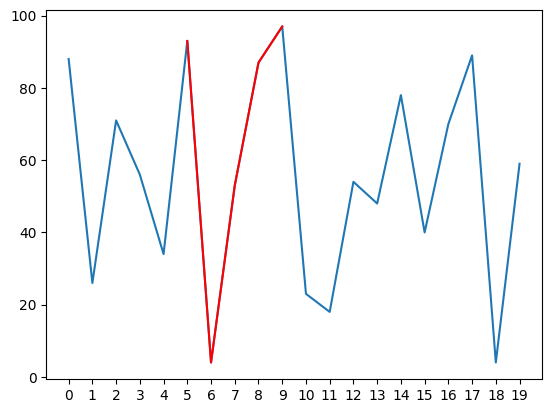

In [349]:
lakes = get_lakes(a)
plt.xticks(np.arange(0, len(a), 1))
plt.plot(a)
max_depth_lake = max(lakes, key=lambda x: x['depth'])
plt.plot(max_depth_lake['points'], [a[x] for x in max_depth_lake['points']] , color='red')

# Show all possible lakes and their depth (Optional)

Amount of lakes: 7


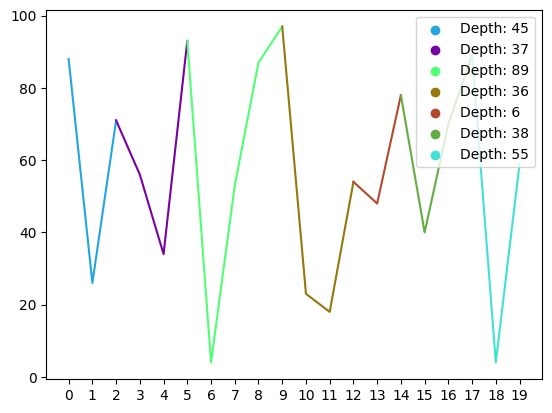

In [350]:
print(f"Amount of lakes: {len(lakes)}") 
legends = []
plt.xticks(np.arange(0, len(a), 1))
for lake in lakes:
    depth = lake['depth']
    points = lake['points']
    color = get_rand_color()
    plt.plot(points, [a[x] for x in points] , color)
    scatter_handle = plt.scatter([], [], c=color, label=f'Depth: {depth}')
    legends.append(scatter_handle)
plt.legend(handles=legends, loc='upper right')